#Import Library

In [38]:
import numpy as np # For numerical operations.
import matplotlib.pyplot as plt # To plot visuals.
from sklearn.datasets import load_digits # Importing the load_digits dataset from Scikit-learn.

from sklearn.model_selection import train_test_split # Splitting data into training and testing sets.

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report # Importing evaluation metrics.

#Import Data

In [4]:
# Loading digits dataset
data = load_digits()

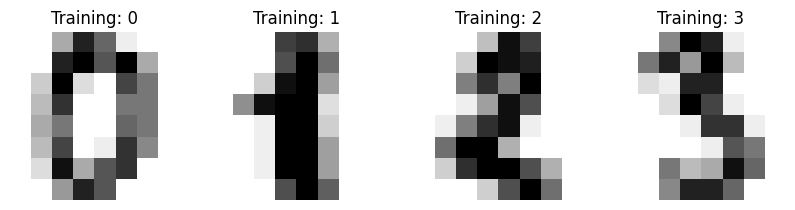

In [10]:
# Creating subplots to visualize images, 1 row, 4 columns, with a specific figure size.
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))

# Loop for displaying the first 4 images from the dataset.
for ax, image, label in zip(axes, data.images, data.target):
  ax.set_axis_off()   # Turn off the axis for the current subplot.
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")   # Display the image in grayscale.
  ax.set_title("Training: %i" % label)    # Set the title for the subplot with the corresponding label.

#Data Preprocessing

In [11]:
data.images.shape   # Displaying the shape of the images array in the dataset.

(1797, 8, 8)

In [13]:
data.images[0]    # Displaying the first image in the dataset.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
data.images[0].shape    # Displaying the shape of the first image in the dataset.

(8, 8)

In [15]:
len(data.images)    # Getting the length of the images array.

1797

In [16]:
n_samples = len(data.images)    # Storing the length of images array in n_samples variable.
df = data.images.reshape((n_samples, -1))   # Reshaping the images array into a 2D array.

In [17]:
df[0]   # Displaying the first row of the reshaped 2D array.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
df[0].shape   # Displaying the shape of the first row in the reshaped 2D array.

(64,)

In [19]:
df.shape    # Displaying the shape of the reshaped 2D array.

(1797, 64)

#Scaling Image Data

In [20]:
df.min()    # Finding the minimum value in the reshaped 2D array.

0.0

In [21]:
df.max()    # Finding the maximum value in the reshaped 2D array.

16.0

In [39]:
df = df/16    # Normalizing the pixel values by dividing by 16.

df.min()    # Confirming the new minimum value after normalization.

In [24]:
df.max()    # Confirming the new maximum value after normalization.

1.0

In [25]:
df[0]   # Displaying the first row of the normalized array.

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train Test Split Data


In [40]:
# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size = 0.3)

# Displaying the shapes of the training and testing sets.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#Random Forest Model

In [30]:
# Initializing the RandomForestClassifier model.
rf = RandomForestClassifier()

# Fitting the RandomForestClassifier model to the training data.
rf.fit(X_train, y_train)

#Predict Test Data

In [41]:
# Making predictions on the test set using the trained model.
y_pred = rf. predict(X_test)

# Displaying the predicted labels.
y_pred

array([1, 1, 7, 1, 1, 5, 7, 1, 5, 3, 5, 1, 5, 5, 5, 3, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 7, 7, 7, 7, 1, 5, 7, 5, 1, 7, 1, 5, 5, 1, 5, 5, 7, 5, 1,
       1, 7, 7, 7, 7, 5, 7, 1, 7, 1, 5, 1, 1, 1, 5, 5, 5, 7, 5, 7, 7, 5,
       7, 1, 5, 5, 5, 5, 5, 1, 3, 1, 7, 7, 5, 5, 1, 1, 1, 5, 5, 1, 5, 7,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 7, 1, 1, 4, 1, 5, 3, 1, 1, 5, 1,
       5, 1, 5, 5, 5, 1, 4, 1, 7, 1, 5, 5, 5, 1, 5, 7, 7, 5, 5, 7, 5, 1,
       3, 5, 1, 7, 3, 5, 5, 1, 5, 7, 7, 5, 1, 5, 7, 1, 3, 1, 1, 1, 1, 7,
       1, 7, 1, 7, 5, 3, 1, 7, 5, 7, 5, 1, 5, 5, 1, 1, 5, 5, 7, 7, 5, 3,
       1, 7, 1, 5, 3, 4, 3, 7, 7, 5, 5, 5, 5, 1, 1, 1, 5, 7, 5, 1, 7, 7,
       1, 5, 7, 7, 5, 7, 1, 5, 7, 5, 1, 5, 5, 1, 1, 1, 1, 5, 7, 7, 5, 7,
       1, 5, 1, 1, 5, 5, 5, 5, 5, 7, 5, 1, 5, 5, 3, 5, 3, 7, 1, 3, 1, 1,
       5, 1, 5, 5, 7, 7, 7, 1, 5, 5, 7, 5, 1, 5, 1, 7, 5, 3, 5, 3, 1, 1,
       1, 1, 3, 5, 3, 3, 1, 7, 3, 5, 1, 5, 5, 5, 1, 3, 7, 7, 5, 7, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 5, 3, 5, 1,

#Model Accuracy

In [36]:
# Generating the confusion matrix using predicted and true labels.
confusion_matrix(y_test, y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  1, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  1],
       [ 0,  0,  1,  0,  0,  1,  1,  0, 53,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 52]])

In [37]:
# Printing the classification report with precision, recall, and F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        52
           2       0.98      1.00      0.99        52
           3       1.00      1.00      1.00        55
           4       0.98      0.94      0.96        48
           5       0.98      0.98      0.98        55
           6       0.98      0.98      0.98        58
           7       0.93      0.98      0.95        63
           8       0.98      0.95      0.96        56
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

